<a href="https://colab.research.google.com/github/cartman12/DS-Unit-1-Sprint-4-Statistical-Tests-and-Experiments/blob/master/Mohamad%20Ali%20Nasser%20-%20DS_Unit_1_Sprint_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 4

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 (the class attribute) is the most interesting, as it separates the 307 approved cases from the 383 rejected cases. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy import stats
from scipy.stats import normaltest
from scipy.stats import ttest_ind

In [0]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data', header = None, names = ['a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11','a12','a13','a14','a15','a16'], na_values="?" )

In [0]:
df.head()

In [0]:
df['a16'].describe(exclude = np.number)

In [0]:
df.isnull().sum()

In [0]:
df['a16'] = df['a16'].replace({'-': 0, '+': 1})

In [0]:
df = df.fillna(method='ffill')

In [19]:
df.shape

(690, 16)

In [0]:
df['a14'] = df['a14'].str.lstrip('0')

In [0]:
df[['a2', 'a14', 'a11', 'a15']] = df[['a2', 'a14', 'a11', 'a15']].astype('float64')

In [0]:
df.dtypes

In [0]:
# TODO

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [0]:
df_cat = df.select_dtypes(exclude = np.number)
df_coun = df.select_dtypes(include =np.number)


In [0]:
df_coun

In [0]:
# creat function that calcultaes pvalue and compares to our CI, if Pvalue is lower than the CI, we will reject null H.
def atrributepvalue(df, ci):
  for column in df_coun[df_coun.columns[:-1]]:
    pos = df_coun[df_coun['a16'] == 1][column]
    neg = df_coun[df_coun['a16'] == 0][column]
    p_val = ttest_ind(pos, neg).pvalue
    t_val = ttest_ind(pos, neg).statistic
    if p_val < ci and pos.mean()>neg.mean():
      print(column, "attribute plays a more favorable role in a postive outcome because the pvalue", round(p_val,4), round(t_val,4), "is less than the confidence interval", ci, "meaning that the probability that this attribute did not play a role is very low")
    elif p_val < ci and neg.mean()>pos.mean():
      print(column, "attribute plays a more favorable role in a negative outcome because the pvalue", round(p_val,4), round(t_val,4), "is less than the confidence interval", ci, "meaning that the probability that this attribute did not play a role is very low")
    else:
      print("no signficant difference, therefore this attribute has no real role in deciding + or -")

In [271]:
atrributepvalue(df_coun, 0.001)

a2 attribute plays a more favorable role in a postive outcome because the pvalue 0.0 4.3145 is less than the confidence interval 0.001 meaning that the probability that this attribute did not play a role is very low
a3 attribute plays a more favorable role in a postive outcome because the pvalue 0.0 5.53 is less than the confidence interval 0.001 meaning that the probability that this attribute did not play a role is very low
a8 attribute plays a more favorable role in a postive outcome because the pvalue 0.0 8.9358 is less than the confidence interval 0.001 meaning that the probability that this attribute did not play a role is very low
a11 attribute plays a more favorable role in a postive outcome because the pvalue 0.0 11.667 is less than the confidence interval 0.001 meaning that the probability that this attribute did not play a role is very low
no signficant difference, therefore this attribute has no real role in deciding + or -
a15 attribute plays a more favorable role in a pos

In [0]:
# Just me exploring data, wasting time sigh

In [0]:
del ct, ct1, ct2

In [0]:
df_cat = pd.merge(df['a16'],df_cat,right_index=True, left_index=True)

In [253]:
df_cat.head()

,a16,a1,a4,a5,a6,a7,a9,a10,a12,a13
0,1,b,u,g,w,v,t,t,f,g
1,1,a,u,g,q,h,t,t,f,g
2,1,a,u,g,q,h,t,f,f,g
3,1,b,u,g,w,v,t,t,t,g
4,1,b,u,g,w,v,t,f,f,s


In [0]:
ct = pd.crosstab(df_cat['a1'],df_cat['a16'])

In [0]:
names = ['a1','a2','a3','a4','a5','a6','a7','a8','a9','a10','a11','a12','a13','a14','a15','a16']
for column in df_cat[1:]:
  ct1 = pd.crosstab(df_cat['a16'], df_cat[column])
  ct2 = pd.merge(ct2, ct1, right_index=True, left_index=True)

In [0]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [0]:
ct

In [0]:
foo = pd.Categorical(['a', 'b'], categories=['a', 'b', 'c'])

In [0]:
ct2 = pd.DataFrame()
for column in df_cat[1:]:
  ct1 = pd.crosstab(df_cat[column],df_cat['a16'])
  ct2 = ct2.append(ct1)

In [0]:
ct2

In [0]:
# i will test Chisqaure for A1 and A13

a1ct = pd.crosstab(df_cat['a16'],df_cat['a1'], margins =True)


In [258]:
a1ct

a1,a,b,All
a16,,,
0,114,269,383
1,100,207,307
All,214,476,690


In [0]:
row_sums = a1ct.iloc[0:2, 2].values
col_sums = a1ct.iloc[2, 0:2].values

In [266]:
total = a1ct.loc['All','All']
total

690

In [267]:
expected = []
for i in range(len(row_sums)):
  expected_row = []
  for column in col_sums:
    expected_val = column*row_sums[i]/total
    expected_row.append(expected_val)
  expected.append(expected_row)
  
print(np.array(expected))

[[118.78550725 264.21449275]
 [ 95.21449275 211.78550725]]


In [0]:
# Seems like the results are on par, we will calculate the Chi square to confirm that there is no signifcant difference

In [273]:
chisquare(pd.crosstab(df_cat['a16'],df_cat['a1']),np.array(expected) )

Power_divergenceResult(statistic=array([0.43331449, 0.19480946]), pvalue=array([0.51036704, 0.65894353]))

In [275]:
stats.chi2_contingency(pd.crosstab(df_cat['a16'],df_cat['a1']))

(0.5037254160868209,
 0.47786776443128076,
 1,
 array([[118.78550725, 264.21449275],
        [ 95.21449275, 211.78550725]]))

In [0]:
# As expected insignifcant

In [0]:
# now we create a function to do the same on all categorical attributes

In [0]:
df_cat.head()

In [0]:
def chi(x):
  chis = []
  for i in df_cat.columns[1:]:
    contingency = pd.crosstab(x['a16'], x[i])
    chi_squared, p_value, dof, expected = stats.chi2_contingency(contingency)
    chis.append(chi_squared)
  return pd.DataFrame(data=[chis], columns = df_cat.columns[1:])

In [0]:
chis = chi(df_cat).rename(index={0:'chis'})

In [0]:
# the chisqaured is important in a9, a10, a6, but we are not sure for a7, so we will calculate the pvalue
def pvalue(x):
  peas = []
  for i in df_cat.columns[1:]:
    contingency = pd.crosstab(x['a16'], x[i])
    p_value = stats.chi2_contingency(contingency)[1]
    peas.append(p_value)
  return pd.DataFrame(data=[peas], columns = df_cat.columns[1:])

In [0]:
peas = pvalue(df_cat).rename(index={0:'peas'})

In [0]:
peas_chis = chis.append(peas)


In [327]:
peas_chis

,a1,a4,a5,a6,a7,a9,a10,a12,a13
chis,0.503725,27.381959,27.381959,1.011572e+02,4.713465e+01,3.552038e+02,1.430696e+02,0.568273,9.191570
peas,0.477868,0.000001,0.000001,9.895987e-16,1.445357e-07,3.118590e-79,5.675727e-33,0.450946,0.010094


In [0]:
# So just to answer, we reject the null H for the following results: a4,a5,a6,a7,a9,a10 and a13 depends on the Confidence interval. And accpet the null H for a1, 12, and a13 depending on the CI.

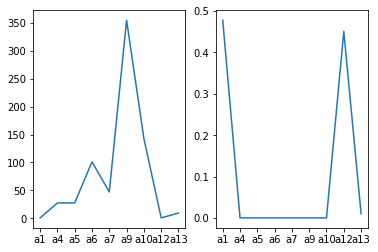

In [338]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(peas_chis.loc['chis',:])
plt.subplot(1,2,2)
plt.plot(peas_chis.loc['peas',:])


plt.show()

In [0]:
# We see a negative correlation 

In [339]:
peas_chis.loc['chis',:].corr(peas_chis.loc['peas',:])

-0.3944429117047019

In [0]:
# pvalue less than 0.05 which means this is important.

In [0]:
# TODO

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

* **bold text**Your words here!*
**1**
From the tests i ran, I see that all the attributes have a pvalue that is less than 0.01 and 0.05, which mean that we reject the null hypothesis.
Or Ho is that these attributes' there is no relationship between the attributes and the outcome. and a pvalue is the probability that such event (mean of Positives for example) is possible given that there is no relationship between these attributes and the outcome. So when the pvalue is less than the confidence interval, what we are really saying that the probability that this event occured under these circumstance is negligable therefore we reject the nukk hyopthesis that there is no relaitonship.
I found that the attributes played a role, and their mean was more skwed toward a postive outocme rather than a negative outcome.
**2**
For the Chisquared what we did is count the occurance of each category in a single attribute relative to its class (+ or -), and then count the total of those. From the total ratios we calculate the expected value for each category, and then we calculate how far or close is the real data to that expected result, the farthest it is the bigger the chi square, the bigger the chi square the lower the probability (pvalue) that this event would occur. And thus this proves that indeed there is a relaitonship between this category and that outcome. When in doubt of what a certain Chisqaure indicate, we can refer to statistics, such as pvalue and ttest
**3**
Technical pythonic things, like manipulating the crosstable and stuff like that, i feel these always take the most time from me and not the questions themselves, I see some people are comfortbale with those, i need a lot of training maybe,  for example i keep forgetting how i've done something several time this past week, so theory okay, python writing and mainpulation was difficult.